# 📊 S&P 500 Companies: Financial Performance Analysis

### **Project Title:**  
**Exploring Sector-Level Financial Trends in the S&P 500 using Bootstrapping & Statistical Inference**

**Dataset Source:**  [Kaggle – S&P 500 Companies with Financial Information](https://www.kaggle.com/datasets/paytonfisher/sp-500-companies-with-financial-information/data)

**Author:**  Kavya Khanna

**Course:**  SEIS 631 – Data Preparation & Analysis (Fall 2025)

**Goal:**  Use real-world financial data to assess and compare key sector metrics, with uncertainty estimation using bootstrapping.

**Background:** S&P 500 stands for the Standard & Poor’s 500 Index.
It is a stock market index that tracks the performance of 500 large, publicly traded companies listed on U.S. stock exchanges.
These companies span 11 sectors, including technology, healthcare, energy, financials, etc.
It is one of the most widely used benchmarks for the overall performance of the U.S. stock market and economy.
**Key Financial Metrics Explained:**
EBITDA → profitability

Earnings/Share → per-share profit

Price/Earnings → valuation

Dividend Yield → investor return

Market Cap → company size

## **Clean the Dataset**

In [2]:
# Import the necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df=pd.read_csv('C:\\Users\\Kavya\\OneDrive - University of St. Thomas\\Desktop\\SEISS-631-02\\assignment-clt-kavyakhanna-1\\financials.csv')

# Cleaning and preprocessing the data
pd.options.display.float_format = '{:,.2f}'.format
df.drop(columns=['Price/Book'], inplace=True)
df['Price/Earnings'].fillna(df['Price/Earnings'].median())
df.duplicated().sum() #no duplicates 
df.select_dtypes(include='object').columns #check all object data type columns


Index(['Symbol', 'Name', 'Sector', 'SEC Filings'], dtype='object')

In [3]:
df.head(10)

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.33,7.92,259.77,175.49,"138,721,055,226.00","9,048,000,000.00",4.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.15,1.70,68.39,48.92,"10,783,419,933.00","601,000,000.00",3.58,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.91,0.26,64.60,42.28,"102,121,042,306.00","5,744,000,000.00",3.74,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.50,3.29,125.86,60.05,"181,386,347,059.00","10,310,000,000.00",6.29,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.71,5.44,162.60,114.82,"98,765,855,553.00","5,643,228,000.00",2.60,http://www.sec.gov/cgi-bin/browse-edgar?action...
5,ATVI,Activision Blizzard,Information Technology,65.83,31.80,0.43,1.28,74.94,38.93,"52,518,668,144.00","2,704,000,000.00",10.60,http://www.sec.gov/cgi-bin/browse-edgar?action...
6,AYI,Acuity Brands Inc,Industrials,145.41,18.22,0.35,7.43,225.36,142.00,"6,242,377,704.00","587,800,000.00",1.80,http://www.sec.gov/cgi-bin/browse-edgar?action...
7,ADBE,Adobe Systems Inc,Information Technology,185.16,52.31,0.00,3.39,204.45,114.45,"94,550,214,268.00","2,538,040,000.00",13.09,http://www.sec.gov/cgi-bin/browse-edgar?action...
8,AAP,Advance Auto Parts,Consumer Discretionary,109.63,19.54,0.22,6.19,169.55,78.81,"8,123,611,867.00","853,941,000.00",1.13,http://www.sec.gov/cgi-bin/browse-edgar?action...
9,AMD,Advanced Micro Devices Inc,Information Technology,11.22,187.00,0.00,0.03,15.65,9.70,"11,191,663,795.00","339,000,000.00",2.11,http://www.sec.gov/cgi-bin/browse-edgar?action...


## **Which sectors typically profit more ?**

In [4]:
#sector wise profit using median 
sector_profit = df.groupby('Sector')['EBITDA'].agg(['median']).round(2)
sector_profit = sector_profit.sort_values(by='median', ascending=False)

sector_profit


,median
Sector,
Telecommunication Services,"45,745,000,000.00"
Consumer Staples,"3,011,012,500.00"
Utilities,"2,895,500,000.00"
Energy,"2,407,000,000.00"
Materials,"2,152,000,000.00"
Consumer Discretionary,"1,962,093,500.00"
Health Care,"1,676,204,000.00"
Information Technology,"1,667,542,000.00"
Industrials,"1,635,916,000.00"


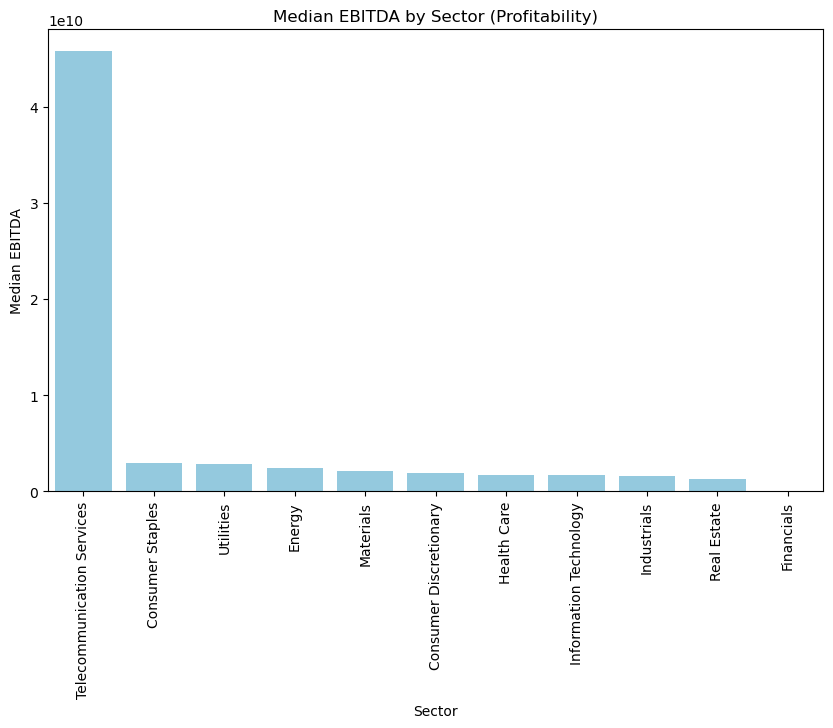

In [5]:

plt.figure(figsize=(10,6))
sns.barplot(x=sector_profit.index, y=sector_profit['median'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Median EBITDA by Sector (Profitability)')
plt.ylabel('Median EBITDA')
plt.show()

The bar chart illustrates the median EBITDA across various sectors in S&P 500 Companies. The technology sector shows the highest profit as compared to the other sectors. However, Financial is the only sector with no profitability indicating loss in that sector. 

### **Permutation test: Telecommunication Vs Non-Telecommunication EBITDA**

**Null Hypothesis:** There is no difference in EBITDA mean for telecommunication companies and mean EBITDA for non-telecommunication companies.
**Alternative Hypothesis:** There is a difference in EBITDA mean for telecommunication companies and mean EBITDA for non-telecommunication companies.

The difference in means between telecommunication sector and all other sector is: 30.25 Billion USD


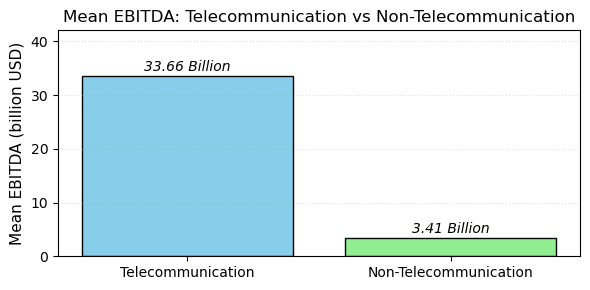

In [6]:
#Saperate the telecommunication and all other sectors
telecom_df_permu=df[df['Sector']=='Telecommunication Services']['EBITDA'].dropna().values
all_sector_df_permu=df[df['Sector']!='Telecommunication Services']['EBITDA'].dropna().values

observed_diff_perm=np.mean(telecom_df_permu)- np.mean(all_sector_df_permu)
print(f'The difference in means between telecommunication sector and all other sector is: {observed_diff_perm/1e9:.2f} Billion USD')

# 3. Convert to billions for plotting
telecom_mean_b = np.mean(telecom_df_permu) / 1e9
non_telecom_mean_b = np.mean(all_sector_df_permu) / 1e9

plt.figure(figsize=(6,3))
groups = ['Telecommunication', 'Non-Telecommunication']
proportions = [telecom_mean_b, non_telecom_mean_b]
plt.bar(groups, proportions, color=['skyblue', 'lightgreen'], edgecolor='black')
plt.ylabel('Mean EBITDA (billion USD)', fontsize=11)
plt.title('Mean EBITDA: Telecommunication vs Non-Telecommunication', fontsize=12)

# y-axis limit for space
ymax = max(proportions) * 1.25   # 25% extra space
plt.ylim(0, ymax)

#Add values on top of bars
for i, v in enumerate(proportions):
    plt.text(i, v + ymax * 0.02,  f"{v:.2f} Billion", ha='center', fontsize=10, fontstyle='italic'
)

# Grid for readability
plt.grid(axis='y', linestyle=':', alpha=0.4)
plt.tight_layout()
plt.show()


From the above bar chart, it appears that the telecommunication sector has a higher mean EBITDA (about 33.66 Billion USD) as compared to other sectors (about 3.41 Billion USD). There is a difference of 30 Billion USD in average EBITDA between telecommunication sector and all other sectors.
This suggests that in S&P 500 companies, telecom sector companies tend to be more profitable on average as compared to the companies in other sectors. However, this is a descriptive stastics from the observed data by taking the mean values. We will perform a permutation test now to assess if this observed difference is statistically significant.

## **Permutation Test: Do Telecommunication companies profit more than other sectors combined ?**

In [7]:
#Permutation test
combined=np.concatenate((telecom_df_permu,all_sector_df_permu))
num_permutations=10000
diff=[]
for _ in range(num_permutations):
    np.random.shuffle(combined)
    new_telecom=combined[:len(telecom_df_permu)]
    new_non_telecom=combined[len(telecom_df_permu):]
    diff.append(new_telecom.mean()- new_non_telecom.mean())

#calculate p-value
mean_difference=np.array(diff)
p_value = np.mean(np.abs(mean_difference) >= np.abs(observed_diff_perm))  # two-sided
print("The p-value from the permutation test is:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: Telecommunication companies profit more than other sectors combined.")
else:
    print("Fail to reject the null hypothesis: No significant difference in profit between telecommunication companies and other sectors combined.")

The p-value from the permutation test is: 0.0002
Reject the null hypothesis: Telecommunication companies profit more than other sectors combined.


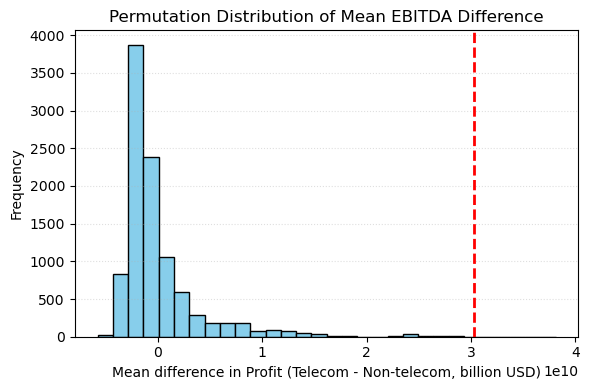

In [8]:
#plotting
plt.figure(figsize=(6,4))
plt.hist(mean_difference, bins=30, color='skyblue',edgecolor='black')
plt.axvline(observed_diff_perm, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Mean difference in Profit (Telecom - Non-telecom, billion USD)')
plt.ylabel('Frequency')

plt.title('Permutation Distribution of Mean EBITDA Difference')
plt.grid(axis='y', linestyle=':', alpha=0.4)
plt.tight_layout()
plt.show()

In the above permutation distribution, the plausible reference distribution is from 0 upton 1 or 2. Most of the simulations are centered around the center at 0. The observed effect which is the red dotted line is at around 30 billion USD is out in the tail of the distribution. This observed effect is very unlikely to have occured by random chance so we conclude that the difference is statistically significant.

## **Highest Market Cap company in Telecommunication Services sector** 

In [9]:
#find the highest market cap company in telecom sector 
telecom_companies=df[df['Sector']=='Telecommunication Services']
telecom_companies=df[df['Sector']=='Telecommunication Services'].sort_values(by='Market Cap', ascending=False).head(10)
telecom_companies

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,SEC Filings
58,T,AT&T Inc,Telecommunication Services,35.57,12.14,5.42,4.76,42.70,32.55,"226,713,270,000.00","49,653,000,000.00",1.41,http://www.sec.gov/cgi-bin/browse-edgar?action...
474,VZ,Verizon Communications,Telecommunication Services,49.04,13.08,4.63,7.36,54.77,42.80,"208,092,277,044.00","45,745,000,000.00",1.65,http://www.sec.gov/cgi-bin/browse-edgar?action...
99,CTL,CenturyLink Inc,Telecommunication Services,16.20,8.35,12.66,1.16,27.61,13.16,"18,237,196,861.00","5,577,000,000.00",1.48,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [10]:
#biggest company
top1=telecom_companies.iloc[0]

#share of sector market cap
sector_total=telecom_companies['Market Cap'].sum()
top1_share=top1['Market Cap'] / sector_total * 100

print(f"Largest telecom company: {top1['Name']}")
print(f"Market cap: {top1['Market Cap']:.2f} (same units as your data)")
print(f"Share of telecom sector market cap: {top1_share:.1f}%")

Largest telecom company: AT&T Inc
Market cap: 226713270000.00 (same units as your data)
Share of telecom sector market cap: 50.0%


## **Exploring Non-Telecommunication Companies**

In [11]:
non_telecom_companies=df[df['Sector'] !='Telecommunication Services']
non_telecom_companies

#sort non telecom companies market cap wise 
non_telecom_companies=non_telecom_companies.sort_values(by='Market Cap',ascending=False)
non_telecom_companies



,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,SEC Filings
51,AAPL,Apple Inc.,Information Technology,155.15,16.86,1.58,9.20,180.10,131.12,"809,508,034,020.00","79,386,000,000.00",3.46,http://www.sec.gov/cgi-bin/browse-edgar?action...
27,GOOGL,Alphabet Inc Class A,Information Technology,"1,007.71",31.48,0.00,22.27,"1,198.00",824.30,"733,823,966,137.00","34,217,000,000.00",6.80,http://www.sec.gov/cgi-bin/browse-edgar?action...
28,GOOG,Alphabet Inc Class C,Information Technology,"1,001.52",40.29,0.00,22.27,"1,186.89",803.19,"728,535,558,140.00","32,714,000,000.00",6.77,http://www.sec.gov/cgi-bin/browse-edgar?action...
311,MSFT,Microsoft Corp.,Information Technology,85.01,25.76,1.87,2.97,96.07,63.22,"689,978,437,468.00","41,079,000,000.00",7.11,http://www.sec.gov/cgi-bin/browse-edgar?action...
30,AMZN,Amazon.com Inc,Consumer Discretionary,"1,350.50",296.16,0.00,6.16,"1,498.00",812.50,"685,873,374,731.00","16,132,000,000.00",3.93,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,NAVI,Navient,Financials,13.38,7.56,4.56,1.01,16.97,11.48,"3,692,691,330.00",0.00,0.70,http://www.sec.gov/cgi-bin/browse-edgar?action...
386,RRC,Range Resources Corp.,Energy,12.82,35.61,0.61,-2.79,34.09,12.70,"3,255,587,970.00","820,095,000.00",1.96,http://www.sec.gov/cgi-bin/browse-edgar?action...
353,PDCO,Patterson Companies,Health Care,32.88,14.05,3.07,1.79,48.30,32.07,"3,209,792,400.00","359,644,000.00",0.79,http://www.sec.gov/cgi-bin/browse-edgar?action...
412,SIG,Signet Jewelers,Consumer Discretionary,49.38,6.65,2.47,7.03,77.94,46.09,"3,034,275,549.00","852,700,000.00",0.76,http://www.sec.gov/cgi-bin/browse-edgar?action...


## **Are the biggest companies priced richer (higher P/E) than others, or not?**

In [12]:
#split into top 20 and rest 
top_20_non_telecom=non_telecom_companies.head(20).copy()
rest_non_telecom=non_telecom_companies.iloc[20:].copy()

#non_telecom_companies.isna().sum()
top_20_non_telecom=top_20_non_telecom[top_20_non_telecom['Price/Earnings'] >0]
rest_non_telecom=rest_non_telecom[rest_non_telecom['Price/Earnings'] >0]

#median price /earnings 
observed_median_diff=np.median(top_20_non_telecom['Price/Earnings'])- np.median(rest_non_telecom['Price/Earnings'])
print(f'The observed difference is : {observed_median_diff}')

# Bootstrap procedure to estimate the sampling distribution of the median P/E difference
n_sim = 10000            # number of bootstrap resamples
boot_diffs = []          # will store the median P/E differences
np.random.seed(42)       # for reproducibility

for i in range(n_sim):
    boot_top=top_20_non_telecom.sample(frac=1,replace=True)
    boot_rest=rest_non_telecom.sample(frac=1,replace=True)
    boot_mean_diffs=np.median(boot_top['Price/Earnings']) - np.median(boot_rest['Price/Earnings'])
    boot_diffs.append(boot_mean_diffs)

#calculate 95% confidence interval 
boot_diffs=np.array(boot_diffs)
lower_ci=np.percentile(boot_diffs,2.5)
upper_ci=np.percentile(boot_diffs,97.5)
print(f'95 % confidence interval for median P/E difference between top 20 and rest no telecom companies :{lower_ci}, {upper_ci}')

The observed difference is : 2.715
95 % confidence interval for median P/E difference between top 20 and rest no telecom companies :-2.59, 8.689999999999998


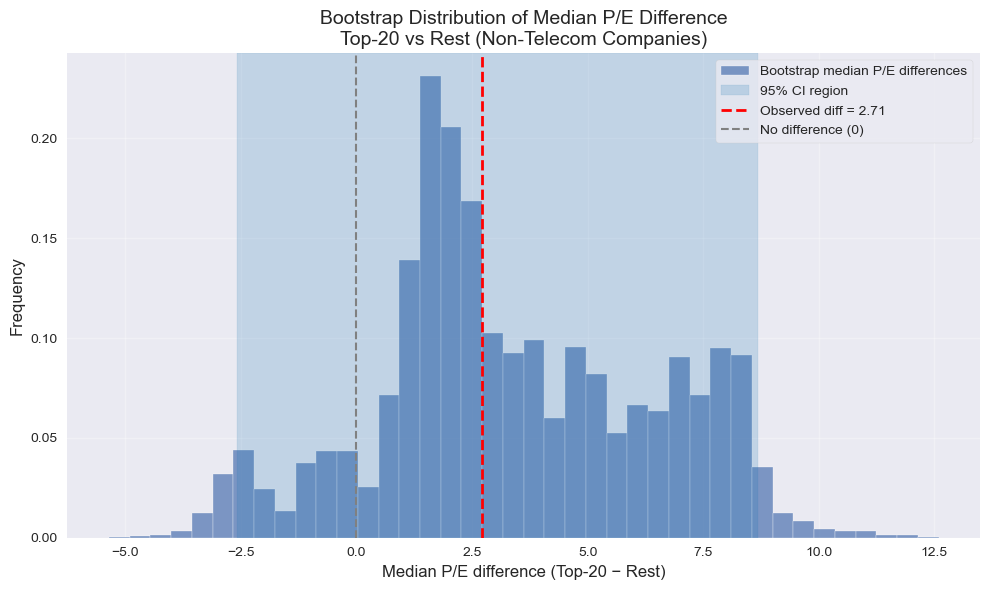

In [13]:
#plotting

plt.style.use("seaborn-v0_8") 
plt.figure(figsize=(10, 6))
#Plot the histogram of bootstrap differences
plt.hist(
    boot_diffs,
    bins=40,
    density=True,
    alpha=0.7,
    edgecolor="white",
    label="Bootstrap median P/E differences"
)
#Shade the 95% CI region
plt.axvspan(
    lower_ci,
    upper_ci,
    color="tab:blue",
    alpha=0.2,
    label="95% CI region"
)

#Add a vertical line for the observed difference
plt.axvline(
    observed_median_diff,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Observed diff = {observed_median_diff:.2f}"
)

#Add a vertical line at 0 (no difference)
plt.axvline(
    0,
    color="grey",
    linestyle="--",
    linewidth=1.5,
    label="No difference (0)"
)

plt.title("Bootstrap Distribution of Median P/E Difference\nTop-20 vs Rest (Non-Telecom Companies)", fontsize=14)
plt.xlabel("Median P/E difference (Top-20 − Rest)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.legend(frameon=True)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


Th above histogram depicts that the distribution of median P/E difference between top 20 non telecom companies  ( by market cap) and the rest of the non-telecom companies. The bootstrap confidence interval is the shaded region. The observed difference is aroudn 2.71 which is the red dotted line, which lies near the center of the bootstrap distribution and well inside the 95% confidence interval. The dashed grey line represents the no difference in median P/E between the top 20 non telecom companies and the rest of the non-telecom companies. Since the observed difference lies well within the confidence interval, we fail to reject the null hypothesis and conclude that there is no significant difference in median P/E between the biggest non-telecom companies and the rest of the non-telecom companies.

## **Conclusion**

I have analyzed the financial performance of S&P 500 companies across telecom and non-telecom sectors using bootstrapping and permutation tests. The telecommunication services sector stands out with a median EBITDA of $45.7 Billion, whereas the other sectors have a median EBITDA of $3.4 Billion and the financial sector shows no EBITDA. Then, I performed the permutation test which revealed that the p-value  around 0.00003, as this p vlaue is less than 0.05, we can reject the null hypothesis and conclude that the telecom sector is significantally more profitable than other sectors combined. Further, I examined the top-20 non-telecom companies by market cap with rest of the non-telecom companies. The bootstrap confidence interval for the median P/E difference included zero, indicating no significant difference in valuation between the biggest non-telecom companies and the rest. Overall, telecom companies are more profitable. 

